# Optimal Control: Vortex Flow

In [1]:
V0 = 1.0    # agent's slip velocity
ω = 0.9

# start and end points
xA = 1/2    
yA = sqrt(3)/2
xB = 1.0
yB = 0.0

# velocity and vorticity fields
u(x,y) = -ω*y
v(x,y) = ω*x
vort(x,y) = 2*ω

# optimal control and travel time
θ = -1.93592
T = 1.97494

# integrated equations of motion
x(t, ang, x0, y0) = x0*cos(ω*t)+V0*t*cos(ω*t)*cos(ang)-y0*sin(ω*t)-V0*t*sin(ω*t)*sin(ang)
y(t, ang, x0, y0) = y0*cos(ω*t)+V0*t*cos(ω*t)*sin(ang)+x0*sin(ω*t)+V0*t*sin(ω*t)*cos(ang)

nothing

### Optimal Trajectory + Perturbations (Noise)

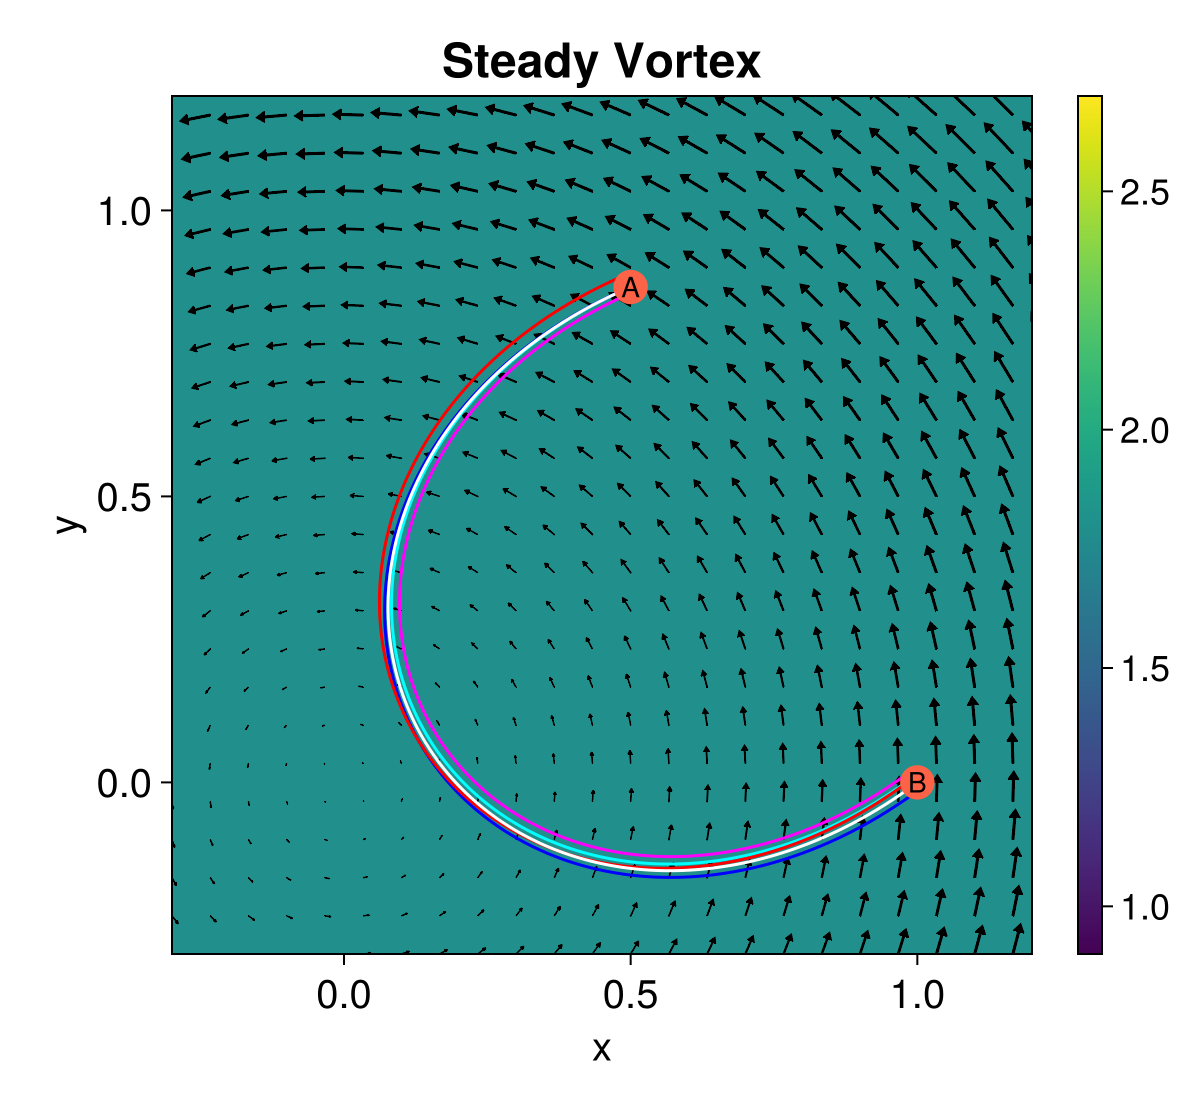

In [4]:
using CairoMakie

xs = range(-0.5, 1.5, length=200)
ys = range(-0.5, 1.5, length=200)
zs = [vort(x,y) for x in xs, y in ys]

xs2 = LinRange(-0.5, 1.5, 31)
ys2 = LinRange(-0.5, 1.5, 31)
us2 = [u(x,y) for x in xs2, y in ys2]
vs2 = [v(x,y) for x in xs2, y in ys2]

times = range(0, T, length=200)
x_track = [x(t, θ, xA, yA) for t in times]
y_track = [y(t, θ, xA, yA) for t in times]

# two trajectiories with noisy initial control θ
ϵ = (pi/180)/2

x1_track = [x(t, θ+ϵ, xA, yA) for t in times]
y1_track = [y(t, θ+ϵ, xA, yA) for t in times]

x2_track = [x(t, θ-ϵ, xA, yA) for t in times]
y2_track = [y(t, θ-ϵ, xA, yA)  for t in times]

# two trajectiories with noisy start point
Δ = 0.025

x3_track = [x(t, θ, xA+Δ, yA) for t in times]
y3_track = [y(t, θ, xA+Δ, yA) for t in times]

x4_track = [x(t, θ, xA, yA+Δ) for t in times]
y4_track = [y(t, θ, xA, yA+Δ) for t in times]

fig = Figure(size = (600, 550))

ax = Axis(fig[1, 1], title = "Steady Vortex", titlesize=24,
    xlabel = "x", xlabelsize=20, xticklabelsize=20,
    ylabel = "y", ylabelsize=20, yticklabelsize=20,
    aspect = 1, limits = ((-0.3, 1.2), (-0.3,1.2))
)

hm = heatmap!(ax, xs, ys, zs, colormap = :viridis, alpha=1.0, colorrange=(0.9, 2.7))
Colorbar(fig[:, end+1], hm, ticklabelsize=18)

arrows2d!(ax, xs2, ys2, us2, vs2, lengthscale = 0.05, tiplength=4, tipwidth=6,
            shaftwidth=1.5)

lines!(ax, x1_track, y1_track, color=:cyan)
lines!(ax, x2_track, y2_track, color=:blue)
lines!(ax, x3_track, y3_track, color=:magenta)
lines!(ax, x4_track, y4_track, color=:red)
lines!(ax, x_track, y_track, color=:white)

poly!(ax, Circle(Point2f(xA, yA), 0.03), color = :tomato)
text!(xA, yA, text = "A", align = (:center, :center))

poly!(ax, Circle(Point2f(xB, yB), 0.03), color = :tomato)
text!(xB, yB, text = "B", align = (:center, :center))

save("vortex-flow.pdf", fig)
fig